# Online Customer Activity: Business Analysis Report

### This notebook answers business questions with custom data visualisations, created with pandas, matplotlib and seaborn libraries. 
### We will dive into the data to extract powerful **actionable insights and reccomendations**.

#### Business Questions

1. **What are our customers doing?**
    - Are sales happenning proportionally more on weekends?
    - Which regions are generating the most revenue currently?
    - Is there any particular website traffic that stands out when generating sales?
    - What percentage of time is spent on the website performing administrative/product or informational related tasks?
    - Are there any informational/administrative tasks which users spend time doing most?
    - What is the breakdown of months making the most sales?

2. **What software are our customers using the most to access the website?**
    - Find the count of the operating systems used to visit the site and the percentage of the total
    - The amount of users visiting the site using mobile operating system and desktop operating systems
    - The most commonly used browsers and their breakdown on mobile versus desktop
    - Based on this analysis of what are the most popular operating systems, are there any regions where there is a discrepancy in what is popular? (To detect potential technical issues)

3. **Do wee need to optimise the marketing strategy?**
    - What traffic is currently generating the most revenue, broken down by region?
    - What traffic has the highest bounce rate?
    - What months have generated the most sales from ads traffic?

4. **Sales Breakdown**
    - Which region is currently generating the most/least revenue?
    - What percentage of our returning/new customers are making a purchase when they visit the site?
    - Are sales being made more on weekends comparatively to weekdays?
    - Is direct/social or advertising traffic contributing heavily to sales?


#### Data dictionary for online customer activity

- **administrative**: Columns which indicates which administrative activity the user was performing on their account.
- **administrative_duration**: How long a user performed administrative tasks in that session.
- **informational**: Indicates which informational activity the user was performing on the website.
- **informational_duration**: How long a users performed informational tasks in seconds during that session.
- **product_related**: Indicates which product the user was viewing on the website.
- **product_related_duration**: How long a user browsed products during that session. 
- **bounce_rates**: Historical bounce rate of that particular page for all users. They visited the directly and immediately exited. Heavily correlated with 'exit_rates'.
- **exit_rates**: Historical exit rate of the users from that particular page. 
- **page_values**: The average value contribution of a page to a customer sale
- **month**: Month the users activity took place
- **operating_systems**: Operating system the user was using
- **browser**: The browser used by the user
- **region**: The region the user originated from
- **traffic_type**: How the user was redirected to the site
- **visitor_type**: Whether a customer was is new/returning or other
- **weekend**: Whether the activity only took place during the weekend
- **revenue**: Whether the customer purchased anything that session

In [1]:
# Import statements
from scripts.info_extractor import DataFrameInfo
from scripts.transformer import DataTransform
from scripts.plotter import Plotter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Upload cleaned data 
customer_activity_df = pd.read_csv('data/cleaned_skewed_data.csv')
customer_activity_df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
# Data cleaning for analysis 
transformer = DataTransform(customer_activity_df)
# Now that all nulls have been dealt with, convert these columns to integer
customer_activity_df = transformer.convert_columns(['administrative','informational','product_related'],'int')
# `convert 'month` to datetime category for our analysis.
customer_activity_df = transformer.convert_columns(['month'],'date')
customer_activity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12319 entries, 0 to 12318
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   administrative            12319 non-null  int64         
 1   administrative_duration   12319 non-null  float64       
 2   informational             12319 non-null  int64         
 3   informational_duration    12319 non-null  float64       
 4   product_related           12319 non-null  int64         
 5   product_related_duration  12319 non-null  float64       
 6   bounce_rates              12319 non-null  float64       
 7   exit_rates                12319 non-null  float64       
 8   page_values               12319 non-null  float64       
 9   month                     12319 non-null  datetime64[ns]
 10  operating_systems         12319 non-null  object        
 11  browser                   12319 non-null  object        
 12  region            

## 1. What are our customers doing?

### ***Are sales proportionally happening more on weekends?***

#### **Insight:** 77% of total sales happen during the week, whereas 23 % of total sales happen on the weekend.

In [4]:
sales_weekends_df = customer_activity_df.iloc[:,-2:]
weekend_effect = sales_weekends_df.groupby(['weekend']).sum()
total_sales = sales_weekends_df['revenue'].sum()
print(total_sales)
weekend_effect['proportion_sales_percentage'] = (weekend_effect['revenue']/total_sales) * 100
weekend_effect.head()

1907


,revenue,proportion_sales_percentage
weekend,,
0,1476,77.399056
1,431,22.600944


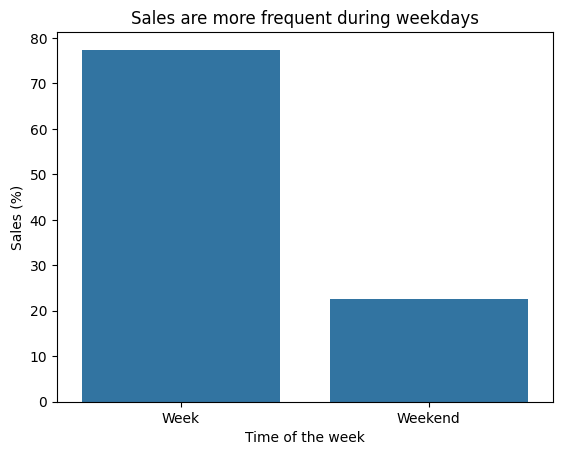

In [5]:
sns.barplot(x=weekend_effect.index, y=weekend_effect['proportion_sales_percentage'])
new_labels = ['Week', 'Weekend']
plt.xticks(range(len(new_labels)), new_labels)
plt.title('Sales are more frequent during weekdays')
plt.xlabel('Time of the week')
plt.ylabel('Sales (%)')
plt.show()

### ***Which regions are generating the most revenue currently?***

#### **Insight:** 39% of total sales happen in North America, followed by 17% in Western Europe. Oceania is the weakest market, making up 2.6% of total sales.

In [6]:
# NOTE would just order this table
info_extractor = DataFrameInfo(customer_activity_df)
region_sales = info_extractor.get_slice(['region','revenue'])
region_sales = region_sales.groupby(['region'],as_index=False).sum()
region_sales

,region,revenue
0,Africa,130
1,Asia,187
2,Eastern Europe,195
3,North America,751
4,Northern Africa,91
5,Oceania,51
6,South America,130
7,Southern Africa,49
8,Western Europe,323


In [7]:
region_sales.at[4,'region'] = 'Africa'
region_sales.at[7,'region'] = 'Africa'
region_sales = region_sales.groupby(['region']).sum()
region_sales['proportion_sales_percentage'] = (region_sales['revenue']/total_sales) * 100
region_sales

,revenue,proportion_sales_percentage
region,,
Africa,270,14.158364
Asia,187,9.805978
Eastern Europe,195,10.225485
North America,751,39.381227
Oceania,51,2.674358
South America,130,6.816990
Western Europe,323,16.937598


/var/folders/1t/k9kg2zvn4r75ygn3223s7x080000gn/T/ipykernel_39936/2090235384.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  rs.set_xticklabels(rs.get_xticklabels(), rotation=90)


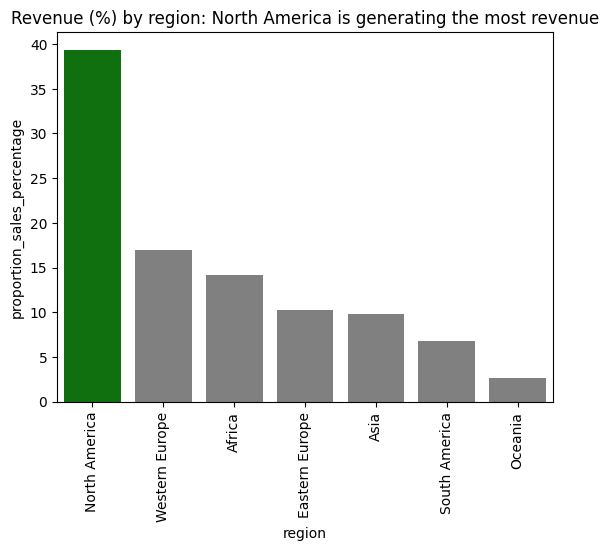

In [8]:
cond_colour1 = ['grey' if x < 20 else 'green' for x in region_sales['proportion_sales_percentage']]
order = region_sales.sort_values(by='proportion_sales_percentage', ascending=False).index
rs = sns.barplot(x=region_sales.index, y=region_sales['proportion_sales_percentage'], order=order, hue=cond_colour1, palette=['grey','green'], legend=False)
plt.title('Revenue (%) by region: North America is generating the most revenue')
rs.set_xticklabels(rs.get_xticklabels(), rotation=90)
plt.show()

### ***Is there any particular website traffic that stands out when generating sales?***

#### **Insight:** Google search brings more than 45% of total revenue, followed by Facebook ads (12%).

/var/folders/1t/k9kg2zvn4r75ygn3223s7x080000gn/T/ipykernel_39936/4287469783.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  wt.set_xticklabels(wt.get_xticklabels(), rotation=90)


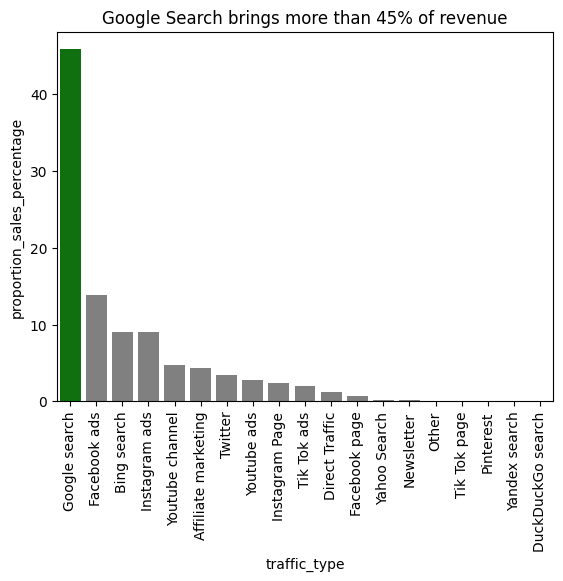

In [9]:
website_traffic = info_extractor.get_slice(['traffic_type','revenue'])
website_traffic = website_traffic.groupby(['traffic_type']).sum()
website_traffic['proportion_sales_percentage'] = (website_traffic['revenue']/total_sales) * 100
order_w = website_traffic.sort_values(by='proportion_sales_percentage', ascending=False).index
cond_colour2 = ['grey' if x < 20 else 'green' for x in website_traffic['proportion_sales_percentage']]
wt = sns.barplot(x=website_traffic.index, y=website_traffic['proportion_sales_percentage'], order=order_w, hue=cond_colour2, palette=['grey','green'], legend=False)
plt.title('Google Search brings more than 45% of revenue')
wt.set_xticklabels(wt.get_xticklabels(), rotation=90)
plt.show()

### ***What percentage of time is spent on the website performing administrative/product or informational related tasks?***

#### **Insights:** Per visit, a user spends 89% of their time in product-related tasks, 8.7% in administrative tasks and 2.2% on informational tasks, on average. 
- There are many outliers that differ from these values (see boxplot below).
- There are a total of 296 product-related tasks, 24 administrative tasks and 13 informational tasks.
- The total amount of hours spent by all users combined in each task are:
    - 4047 hours in product-related tasks.
    - 269.5 hours in administrative tasks.
    - 114.5 hours in informational tasks.

In [10]:
info_extractor_2 = DataFrameInfo(customer_activity_df)
admin_task = info_extractor_2.get_slice(['administrative','administrative_duration'])
product_related_task = info_extractor_2.get_slice(['product_related','product_related_duration'])
informational_task = info_extractor_2.get_slice(['informational','informational_duration'])
combined = info_extractor_2.get_slice(['administrative','administrative_duration','informational','informational_duration','product_related','product_related_duration'])
# For our purpose, we are going to drop all records where time = 0 for all three task types simultaneously 
combined_filtered = combined[~((combined['administrative_duration'] == 0) & (combined['informational_duration'] == 0) & (combined['product_related_duration'] == 0))]
task_times = combined_filtered.copy()
task_times['total_time_per_visit'] = task_times['administrative_duration'] + task_times['informational_duration'] + task_times['product_related_duration']
task_times['admin_time_%'] = (task_times['administrative_duration'] / task_times['total_time_per_visit']) * 100
task_times['info_time_%'] = (task_times['informational_duration'] / task_times['total_time_per_visit']) * 100
task_times['product_time_%'] = (task_times['product_related_duration'] / task_times['total_time_per_visit']) * 100

In [11]:
# To calculate:
# - Total time spent overall on each task type
# - COunt of tasks of each type
# - Time percentage plotted as below but in a barplot.

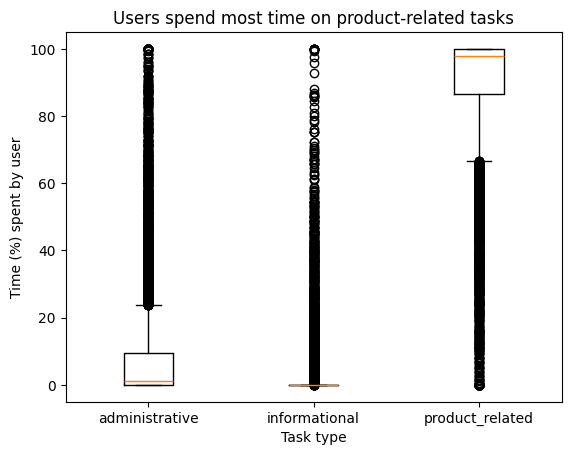

In [12]:
labels=['administrative', 'informational', 'product_related']
plt.boxplot([task_times['admin_time_%'], task_times['info_time_%'], task_times['product_time_%']], labels=labels )
plt.xlabel('Task type')
plt.ylabel('Time (%) spent by user')
plt.title('Users spend most time on product-related tasks')
plt.show()

In [13]:
info_extractor = DataFrameInfo(task_times)
task_times_only = info_extractor.get_slice(['admin_time_%','info_time_%','product_time_%'])
average_times = task_times_only.mean()
average_times

admin_time_%       8.687842
info_time_%        2.178569
product_time_%    89.133589
dtype: float64

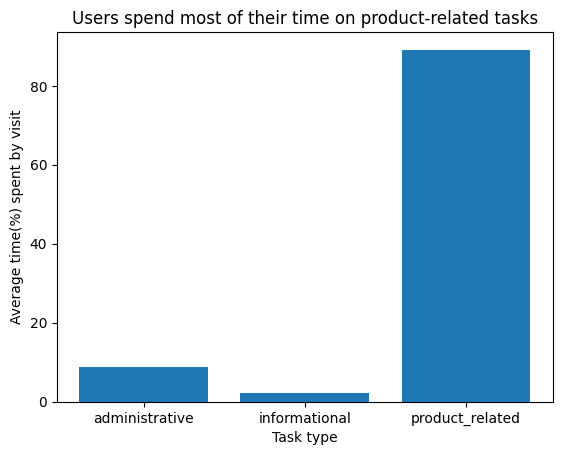

In [14]:
plt.bar(labels, average_times)
plt.xlabel('Task type')
plt.ylabel('Average time(%) spent by visit')
plt.title('Users spend most of their time on product-related tasks')
plt.show()

In [15]:
labels=['administrative', 'informational', 'product_related']
tasks_only = info_extractor.get_slice(['administrative', 'informational', 'product_related'])
durations_only = info_extractor.get_slice(['administrative_duration','informational_duration','product_related_duration'])
durations_totals = durations_only.sum()/(60*60)
durations_totals

administrative_duration      269.478434
informational_duration       114.740786
product_related_duration    4046.964722
dtype: float64

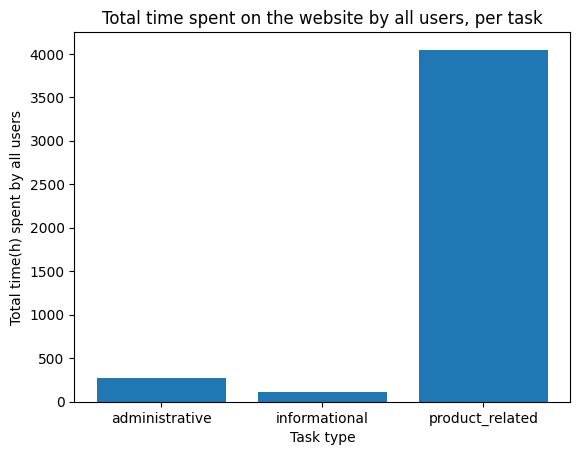

In [16]:
plt.bar(labels, durations_totals)
plt.xlabel('Task type')
plt.ylabel('Total time(h) spent by all users')
plt.title('Total time spent on the website by all users, per task')
plt.show()

In [17]:
 # TODO Would also get the count of the amount of tasks per segment and total time spent
labels=['administrative', 'informational', 'product_related']
tasks_only = info_extractor.get_slice(['administrative', 'informational', 'product_related'])
durations_only = info_extractor.get_slice(['administrative_duration','informational_duration','product_related_duration'])
info_extractor = DataFrameInfo(tasks_only)
task_counts = info_extractor.count_distinct_values()
transformer = DataTransform(task_counts)
task_counts = transformer.rename_column('distinct_values_count','total_number_of_tasks')
task_counts

,total_number_of_tasks
column,
administrative,24
informational,13
product_related,296


### ***Are there any informational/administrative tasks which users spend time doing most?***

#### **Insight:** On average, users spents most time doing administrative tasks '21' and '17', and informational tasks '8' and '10'. However, there is **high variability** in the most pupular tasks amongst the user base. 

/var/folders/1t/k9kg2zvn4r75ygn3223s7x080000gn/T/ipykernel_39936/3622874086.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  at.set_xticklabels(at.get_xticklabels(), rotation=90)


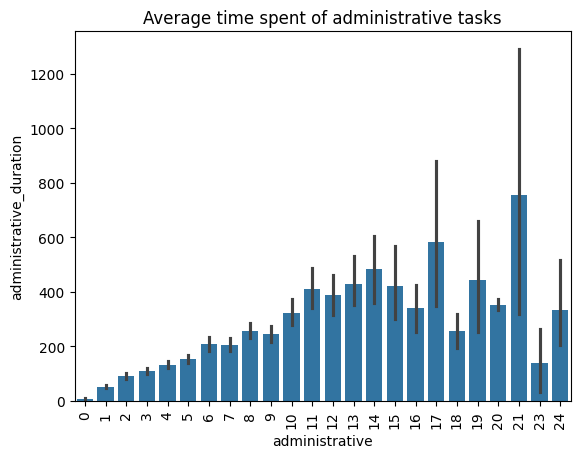

In [18]:
at = sns.barplot(data=admin_task, y="administrative_duration", x="administrative")
plt.title('Average time spent of administrative tasks')
at.set_xticklabels(at.get_xticklabels(), rotation=90)
plt.show()

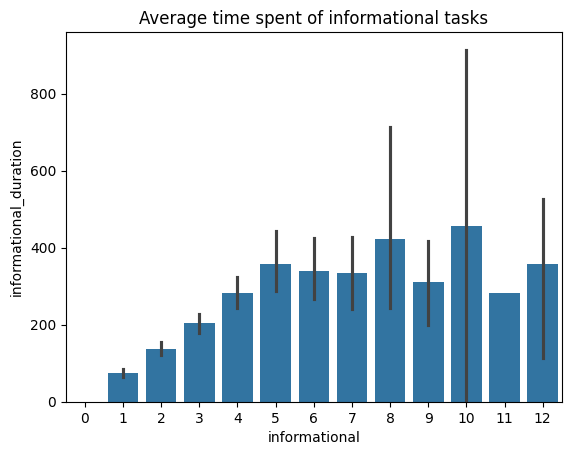

In [19]:
sns.barplot(data=informational_task, y="informational_duration", x="informational")
plt.title('Average time spent of informational tasks')
plt.show()

### ***What is the breakdown of months making the most sales?***

#### **Insight:** November is the month with the most revenue (38%) followed by May (17.5%).

/var/folders/1t/k9kg2zvn4r75ygn3223s7x080000gn/T/ipykernel_39936/2759267094.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_sales['month'] = month_sales['month'].dt.month


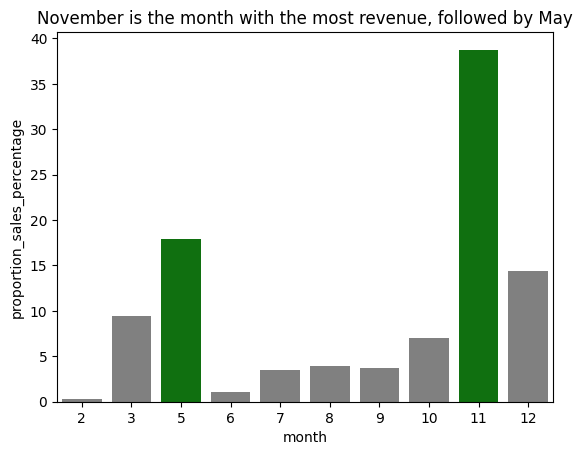

In [20]:
# Love the highlighting of the columns here great job 
info_extractor = DataFrameInfo(customer_activity_df)
month_sales = info_extractor.get_slice(['month','revenue'])
month_sales['month'] = month_sales['month'].dt.month
month_sales = month_sales.groupby(['month']).sum()
month_sales['proportion_sales_percentage'] = (month_sales['revenue']/total_sales) * 100
cols = ['grey' if x < 15 else 'green' for x in month_sales.proportion_sales_percentage]
sns.barplot(x=month_sales.index, y=month_sales['proportion_sales_percentage'],hue=cols, palette =['grey', 'green'], legend=False)
plt.title('November is the month with the most revenue, followed by May')
plt.show()


## 2. What ***software*** are our customers using the most to access the website?

### ***The count of the operating systems used to visit the site and the percentage of the total***

#### **Insight:** The three most used operating systems are: Windows (53.5%), MacOS (21.7%) and Android (21%).

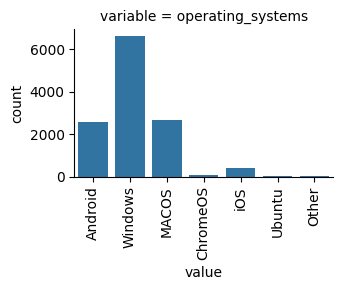

In [21]:
plotter = Plotter(customer_activity_df)
plotter.count_plots_grid(['operating_systems'])

In [22]:
total_entries = len(customer_activity_df['operating_systems'])
os_counts = customer_activity_df.copy()
info_extractor_3 = DataFrameInfo(os_counts)
os_counts = info_extractor_3.get_slice(["operating_systems"])
os_counts['counts'] = 1
os_counts = os_counts.groupby(['operating_systems']).sum()
os_counts["count_%"] = (os_counts['counts'] / total_entries) * 100
order = os_counts.sort_values(by='count_%', ascending=False).index
os_counts

/var/folders/1t/k9kg2zvn4r75ygn3223s7x080000gn/T/ipykernel_39936/202826804.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  os_counts['counts'] = 1


,counts,count_%
operating_systems,,
Android,2584,20.975729
ChromeOS,62,0.503288
MACOS,2676,21.722542
Other,7,0.056823
Ubuntu,9,0.073058
Windows,6596,53.543307
iOS,385,3.125254


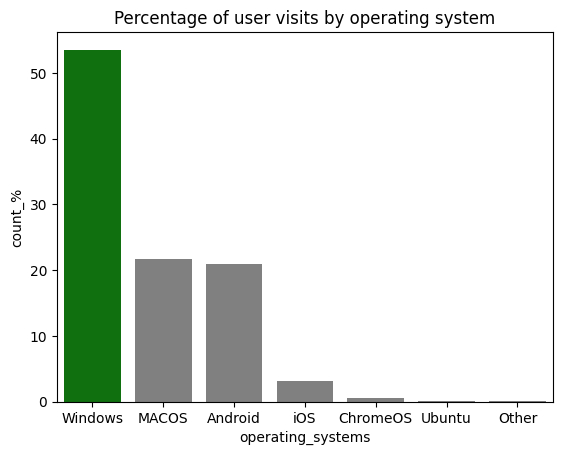

In [23]:
cols = ['grey' if x < 30 else 'green' for x in os_counts['count_%']]
sns.barplot(x=os_counts.index, y=os_counts['count_%'],order=order, hue=cols, palette = ['grey','green'], legend = False)
plt.title('Percentage of user visits by operating system')
plt.show()

### ***The amount of users visiting the site using mobile operating system and desktop operating systems***

#### **Insight:** 76% of users access the website through desktop and 24% via mobile.

In [24]:
# Add column for device type (mobile or desktop) and drop outliers in operating systems ('Other')
map_dev = {'Android':'mobile', 'iOS':'mobile', 'MACOS': 'desktop','ChromeOS':'desktop','Windows':'desktop','Ubuntu':'desktop'}
device_df = os_counts.copy()
device_df['device'] = device_df.index.map(map_dev)
device_df.dropna(subset='device', inplace=True)
device_df_grouped = device_df.groupby(['device']).sum().reset_index()
device_df_grouped

,device,counts,count_%
0,desktop,9343,75.842195
1,mobile,2969,24.100982


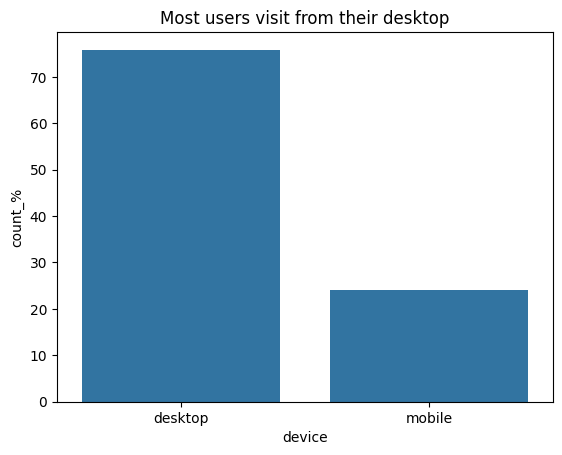

In [25]:
sns.barplot(x=device_df_grouped['device'], y=device_df_grouped['count_%'])
plt.title('Most users visit from their desktop')
plt.show()

### ***The most commonly used browsers and their breakdown on mobile versus desktop***

#### **Insights:** The three most used browsers are: Google Chrome (65.6%), Safari (20.5%) and Mozilla Firefox (6.7%).
- All 3 top browsers were accessed more often through desktop than mobile:
    - Google Chrome: 66.7% desktop users.
    - Safari: 91% desktop users.
    - Mozilla Firefox: 98% desktop users.
- The only browser that was accessed more often via mobile was Android (0.98% of visits), with 95% of Android users accessing via mobile.

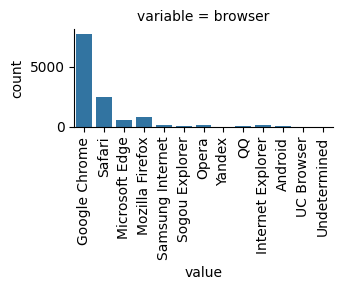

In [37]:
plotter.count_plots_grid(['browser'])
#sns.catplot(x='class', y='survival rate', hue='sex', data=dfm, kind='bar', height=5, aspect=1)

In [38]:
browser_only = customer_activity_df.copy()
browser_only['counts'] = 1
info_extractor = DataFrameInfo(browser_only)
browser_only_counts =  info_extractor.get_slice(['browser','counts'])
browser_only_counts = browser_only_counts.groupby(['browser']).sum(['counts'])
browser_only_counts['counts_%'] = (browser_only_counts['counts']/total_entries)*100
browser_only_counts

,counts,counts_%
browser,,
Android,121,0.982223
Google Chrome,7711,62.594366
Internet Explorer,156,1.266337
Microsoft Edge,582,4.724409
Mozilla Firefox,830,6.737560
Opera,136,1.103986
QQ,53,0.430230
Safari,2526,20.504911
Samsung Internet,145,1.177044


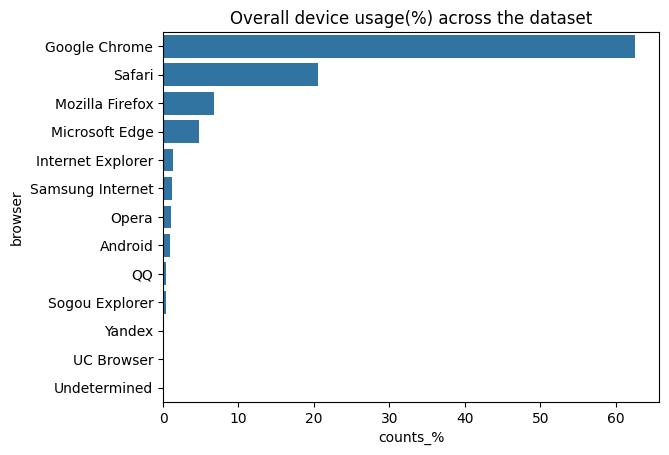

In [43]:
order = browser_only_counts.sort_values(by='counts_%', ascending=False).index
sns.barplot(y=browser_only_counts.index, x=browser_only_counts['counts_%'],order=order)
plt.title('Overall device usage(%) across the dataset')
plt.show()

In [45]:
browser_device_region = customer_activity_df.copy()
browser_device_region['device'] = browser_device_region['operating_systems'].map(map_dev)
browser_device_region.dropna(subset='device', inplace=True)
browser_device_region['counts'] = 1
info_extractor = DataFrameInfo(browser_device_region)
browser_device_region =  info_extractor.get_slice(['operating_systems','browser','region','device','counts'])
browser_device_region = browser_device_region[browser_device_region['browser'] != 'Yandex']
browser_device_region = browser_device_region[browser_device_region['browser'] != 'UC Browser']
browser_device_region = browser_device_region[browser_device_region['browser'] != 'Sogou Explorer']
browser_device = browser_device_region.groupby(['browser','device']).sum(['counts'])
browser_device['counts_%'] = (browser_device['counts']/total_entries)*100

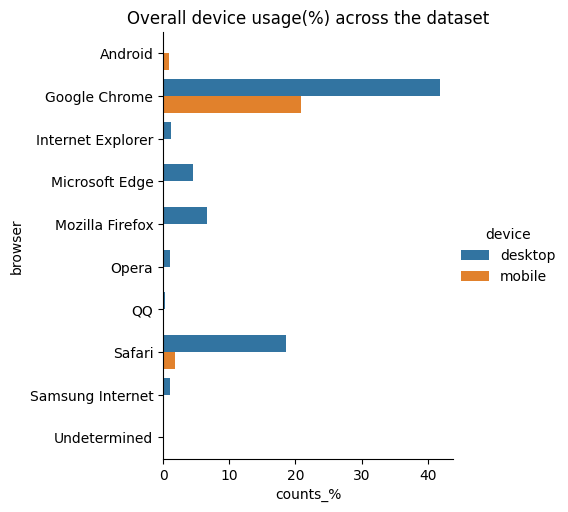

In [31]:
sns.catplot(y='browser', x='counts_%', hue='device', data=browser_device, kind='bar', height=5, aspect=1)
plt.title('Overall device usage(%) across the dataset')
plt.show()

In [46]:
browser_dev_df2 = browser_device_region.groupby(['browser']).sum(['counts'])
browser_dev_df2.rename(columns={"counts":"counts_per_browser"},inplace=True)
browser_device = browser_device.join(browser_dev_df2)
browser_device["counts_%_relative"] = (browser_device["counts"] / browser_device['counts_per_browser']) * 100
browser_device

counts   counts_%  counts_per_browser  \
browser           device                                           
Android           desktop       5   0.040588                 121   
                  mobile      116   0.941635                 121   
Google Chrome     desktop    5150  41.805341                7711   
                  mobile     2561  20.789025                7711   
Internet Explorer desktop     142   1.152691                 156   
                  mobile       14   0.113646                 156   
Microsoft Edge    desktop     566   4.594529                 582   
                  mobile       16   0.129881                 582   
Mozilla Firefox   desktop     816   6.623914                 829   
                  mobile       13   0.105528                 829   
Opera             desktop     130   1.055280                 136   
                  mobile        6   0.048705                 136   
QQ                desktop      45   0.365289                  53   
                  mobile        8   0.064940                  53   
Safari            desktop    2295  18.629759                2520   
                  mobile      225   1.826447                2520   
Samsung Internet  desktop     139   1.128338                 145   
                  mobile        6   0.048705                 145   
Undetermined      desktop       2   0.016235                   2   

                           counts_%_relative  
browser           device                      
Android           desktop           4.132231  
                  mobile           95.867769  
Google Chrome     desktop          66.787706  
                  mobile           33.212294  
Internet Explorer desktop          91.025641  
                  mobile            8.974359  
Microsoft Edge    desktop          97.250859  
                  mobile            2.749141  
Mozilla Firefox   desktop          98.431846  
                  mobile            1.568154  
Opera             desktop          95.588235  
                  mobile            4.411765  
QQ                desktop          84.905660  
                  mobile           15.094340  
Safari            desktop          91.071429  
                  mobile            8.928571  
Samsung Internet  desktop          95.862069  
                  mobile            4.137931  
Undetermined      desktop         100.000000

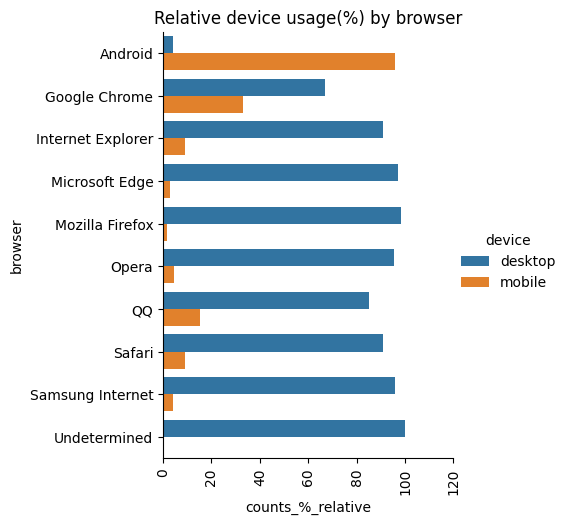

In [33]:
g = sns.catplot(y='browser', x='counts_%_relative', hue='device', data=browser_device, kind='bar', height=5, aspect=1)
g.set_xticklabels(rotation=90)
plt.title('Relative device usage(%) by browser')
plt.show()

/var/folders/1t/k9kg2zvn4r75ygn3223s7x080000gn/T/ipykernel_39330/1982491081.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90)


Text(0.5, 1.0, 'Relative device usage(%) by browser')

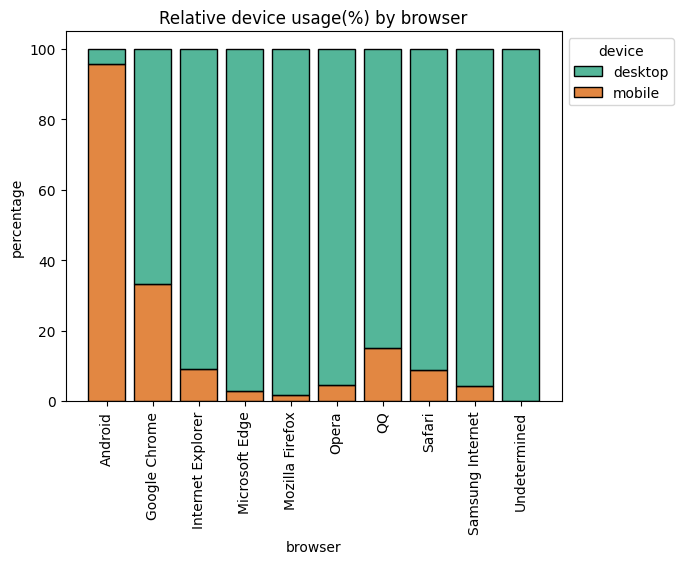

In [ ]:
ax4 = sns.histplot(browser_device, x='browser', hue='device', weights='counts_%_relative',
             multiple='stack', palette='Dark2', shrink=0.8)
ax4.set_ylabel('percentage')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90)
# Fix the legend so it's not on top of the bars.
legend = ax4.get_legend()
legend.set_bbox_to_anchor((1, 1))
plt.title('Relative device usage(%) by browser')

### Based on this analysis of what are the most popular operating systems, ***are there any regions where there is a discrepancy in what is popular?*** 

This could be an indication that users in that region are having technical issues that the tech team might want to investigate.

In [ ]:
os_region = browser_device_region.copy()
map_reg = {'Africa':'Africa','Northern Africa':'Africa','Southern Africa':'Africa', 'Oceania': 'Oceania', 'Eastern Europe': 'Eastern Europe','Western Europe': 'Western Europe','Asia':'Asia','North America':'North America', 'South America':'South America'}
os_region['region'] = os_region['region'].map(map_reg)
os_region_df1 = os_region.groupby(['region', 'operating_systems']).sum(['counts'])
os_region_df1['counts_%'] = (os_region_df1['counts']/total_entries)*100                                                                    

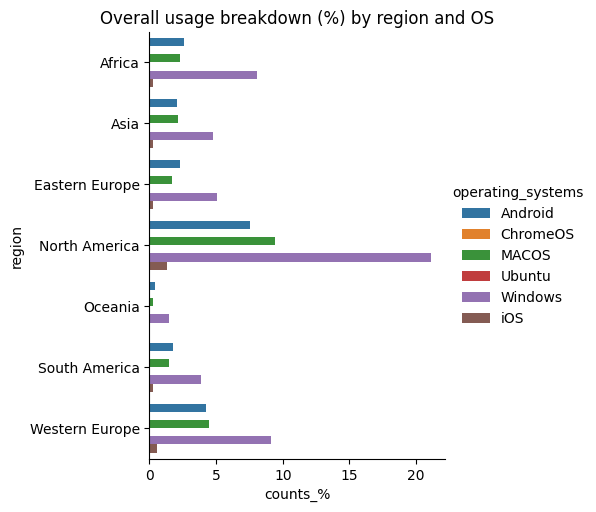

In [ ]:
sns.catplot(y='region', x='counts_%', hue='operating_systems', data=os_region_df1, kind='bar')
plt.title('Overall usage breakdown (%) by region and OS')
plt.show()

In [ ]:
os_region_df2 = os_region.groupby(['region']).sum(['counts'])
os_region_df2.rename(columns={"counts":"counts_per_region"},inplace=True)
os_region_df2 = os_region_df1.join(os_region_df2)
os_region_df2["counts_%_relative"] = (os_region_df2["counts"] / os_region_df2['counts_per_region']) * 100

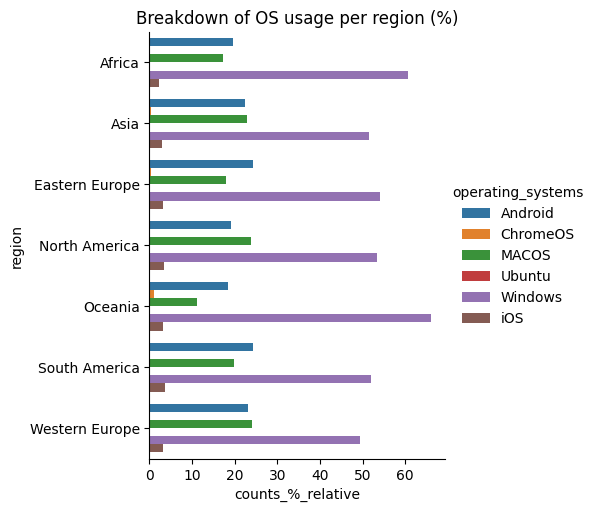

In [ ]:
sns.catplot(y='region', x='counts_%_relative', hue='operating_systems', data=os_region_df2, kind='bar')
plt.title('Breakdown of OS usage per region (%)')
plt.show()

/var/folders/1t/k9kg2zvn4r75ygn3223s7x080000gn/T/ipykernel_39330/3361108063.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)


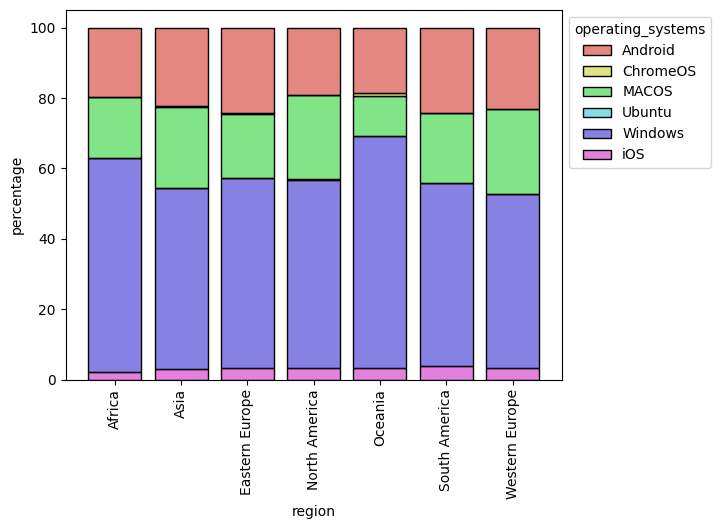

In [ ]:
ax3 = sns.histplot(os_region_df2, x='region', hue='operating_systems', weights='counts_%_relative',
             multiple='stack', palette='hls', shrink=0.8)
ax3.set_ylabel('percentage')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
# Fix the legend so it's not on top of the bars.
legend = ax3.get_legend()
legend.set_bbox_to_anchor((1, 1))

## Task 3: Do we need to optimise our marketing strategy?

### ***What traffic is currently generating the most revenue, broken down by region?***

In [ ]:
df1 = customer_activity_df.copy()
info_extractor_4 = DataFrameInfo(df1)
df1 = info_extractor_4.get_slice(['traffic_type','region','revenue'])
df1['region'] = df1['region'].map(map_reg)
exclude_traffic_types = ['Yandex search', 'DuckDuckGo search', 'Other', 'Tik Tok page']
df1 = df1[~df1['traffic_type'].isin(exclude_traffic_types)]
df2 = df1.groupby(['traffic_type','region']).sum() 
total_revenue = df2['revenue'].sum()
df2['%_total_revenue'] = (df2['revenue']/total_revenue)*100           

/var/folders/1t/k9kg2zvn4r75ygn3223s7x080000gn/T/ipykernel_39330/969934840.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['region'] = df1['region'].map(map_reg)


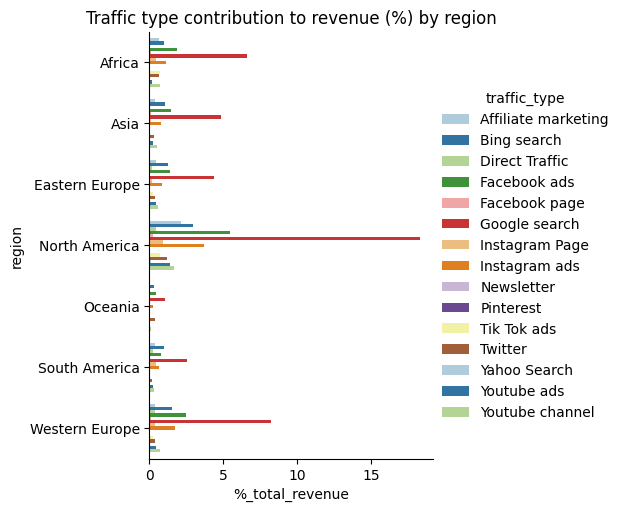

In [ ]:
sns.catplot(y='region', x='%_total_revenue', hue='traffic_type', data=df2, kind='bar', palette='Paired')
plt.title('Traffic type contribution to revenue (%) by region')
plt.show()

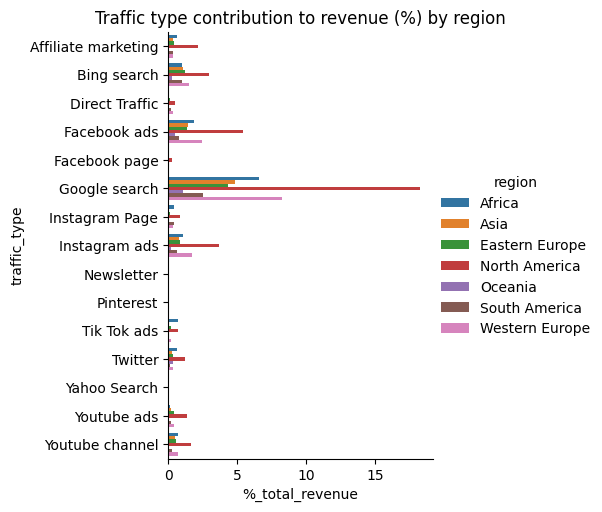

In [ ]:
sns.catplot(y='traffic_type', x='%_total_revenue', hue='region', data=df2, kind='bar')
plt.title('Traffic type contribution to revenue (%) by region')
plt.show()

In [ ]:
df3 = df1.groupby(['region']).sum()
df3.rename(columns={"revenue":"revenue_by_region"},inplace=True)
del df3['traffic_type']
df4 = df1.groupby(['region','traffic_type']).sum() 
df3 = df4.join(df3)
df3["revenues_%_relative"] = (df3["revenue"] / df3['revenue_by_region']) * 100

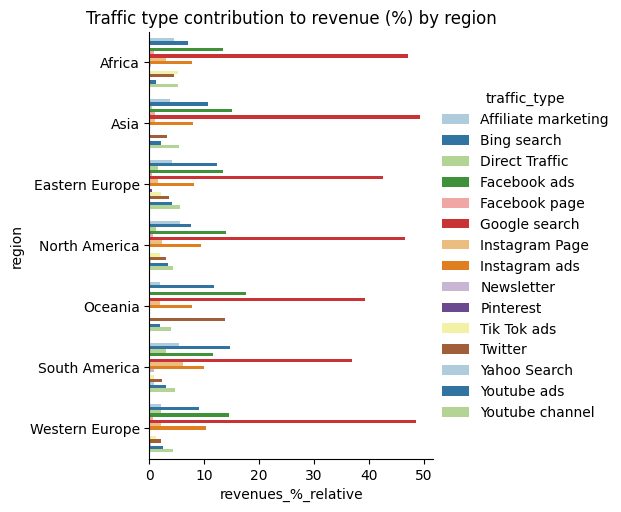

In [ ]:
sns.catplot(y='region', x='revenues_%_relative', hue='traffic_type', data=df3, kind='bar', palette='Paired')
plt.title('Traffic type contribution to revenue (%) by region')
plt.show()

/var/folders/1t/k9kg2zvn4r75ygn3223s7x080000gn/T/ipykernel_39330/3433374329.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


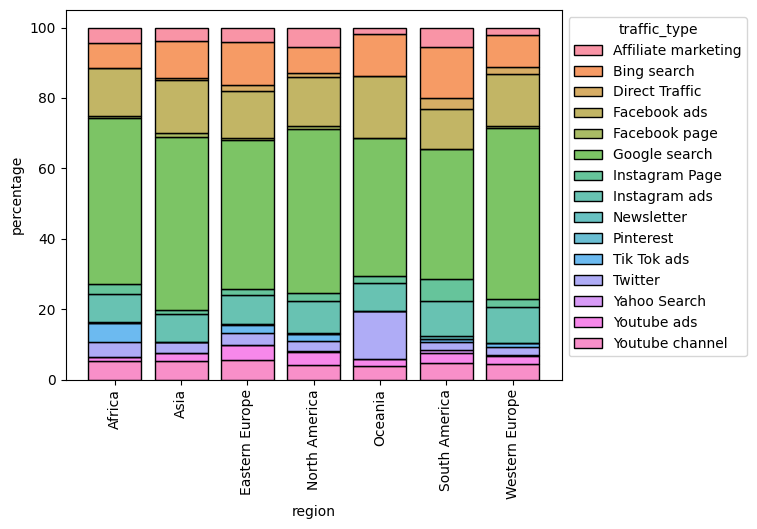

In [ ]:
ax2 = sns.histplot(df3, x='region', hue='traffic_type', weights='revenues_%_relative',
             multiple='stack', shrink=0.8)
ax2.set_ylabel('percentage')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
# Fix the legend so it's not on top of the bars.
legend = ax2.get_legend()
legend.set_bbox_to_anchor((1, 1))

In [ ]:
df5 = df1.groupby(['traffic_type']).sum()
df5.rename(columns={"revenue":"revenue_by_traffic_type"},inplace=True)
del df5['region']
df5 = df2.join(df5)
df5["revenues_%_relative"] = (df5["revenue"] / df5['revenue_by_traffic_type']) * 100

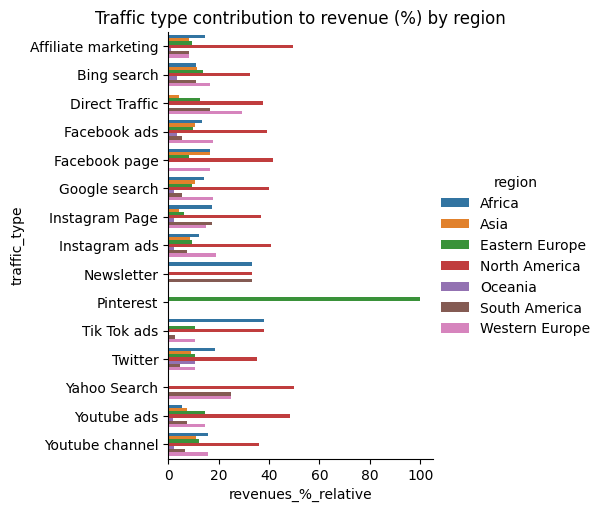

In [ ]:
sns.catplot(y='traffic_type', x='revenues_%_relative', hue='region', data=df5, kind='bar')
plt.title('Traffic type contribution to revenue (%) by region')
plt.show()

/var/folders/1t/k9kg2zvn4r75ygn3223s7x080000gn/T/ipykernel_39330/2928727587.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


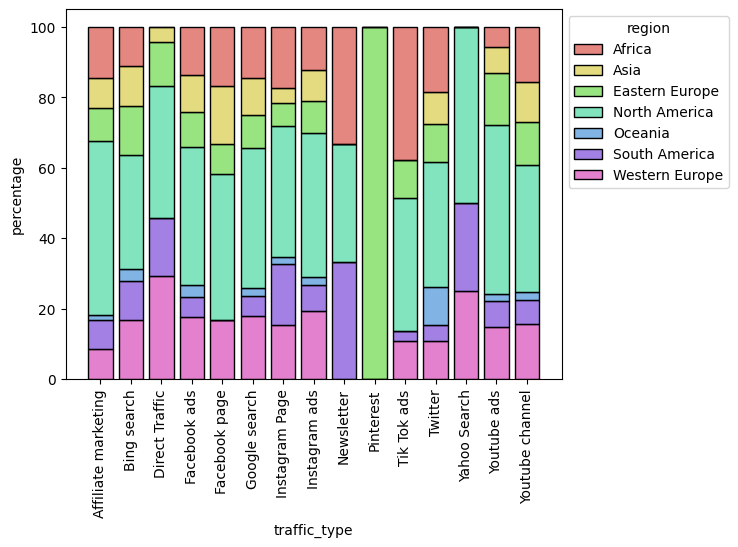

In [ ]:
ax = sns.histplot(df5, x='traffic_type', hue='region', weights='revenues_%_relative',
             multiple='stack', palette='hls', shrink=0.8)
ax.set_ylabel('percentage')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# Fix the legend so it's not on top of the bars.
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))

### ***What traffic has the highest bounce rate?***

This could indicate that the marketing channels advertisement isn't enticing enough - for the customers. Conversely a low bounce rate can indicate that the strategy is highly effective. Break down this data by region.

/var/folders/1t/k9kg2zvn4r75ygn3223s7x080000gn/T/ipykernel_39330/1018513754.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  brd.set_xticklabels(brd.get_xticklabels(), rotation=90)


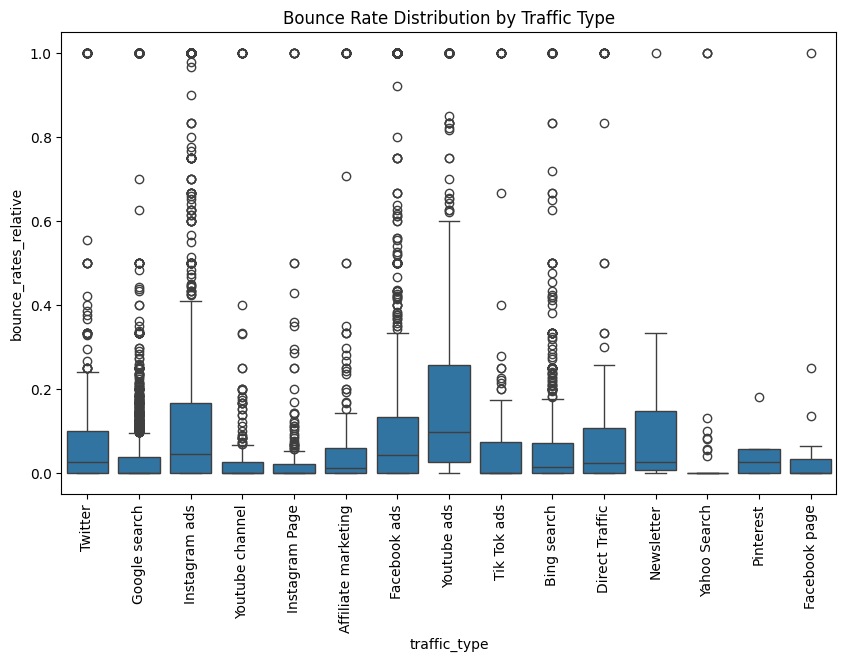

In [ ]:
# TODO I would also get a count of these bounce rates for each region with a bar graph

info_extractor =  DataFrameInfo(customer_activity_df)
bounce_rates_df = info_extractor.get_slice(['bounce_rates','traffic_type','region'])
exclude_traffic_types = ['Yandex search', 'DuckDuckGo search', 'Other', 'Tik Tok page']
bounce_rates_df = bounce_rates_df[~bounce_rates_df['traffic_type'].isin(exclude_traffic_types)]
bounce_rates_df['bounce_rates_relative'] = (bounce_rates_df['bounce_rates']/0.2)
bounce_rates_df['region'] = bounce_rates_df['region'].map(map_reg)

plt.figure(figsize=(10, 6))
brd = sns.boxplot(x='traffic_type', y='bounce_rates_relative', data=bounce_rates_df)
brd.set_xticklabels(brd.get_xticklabels(), rotation=90)
plt.title('Bounce Rate Distribution by Traffic Type')
plt.show()

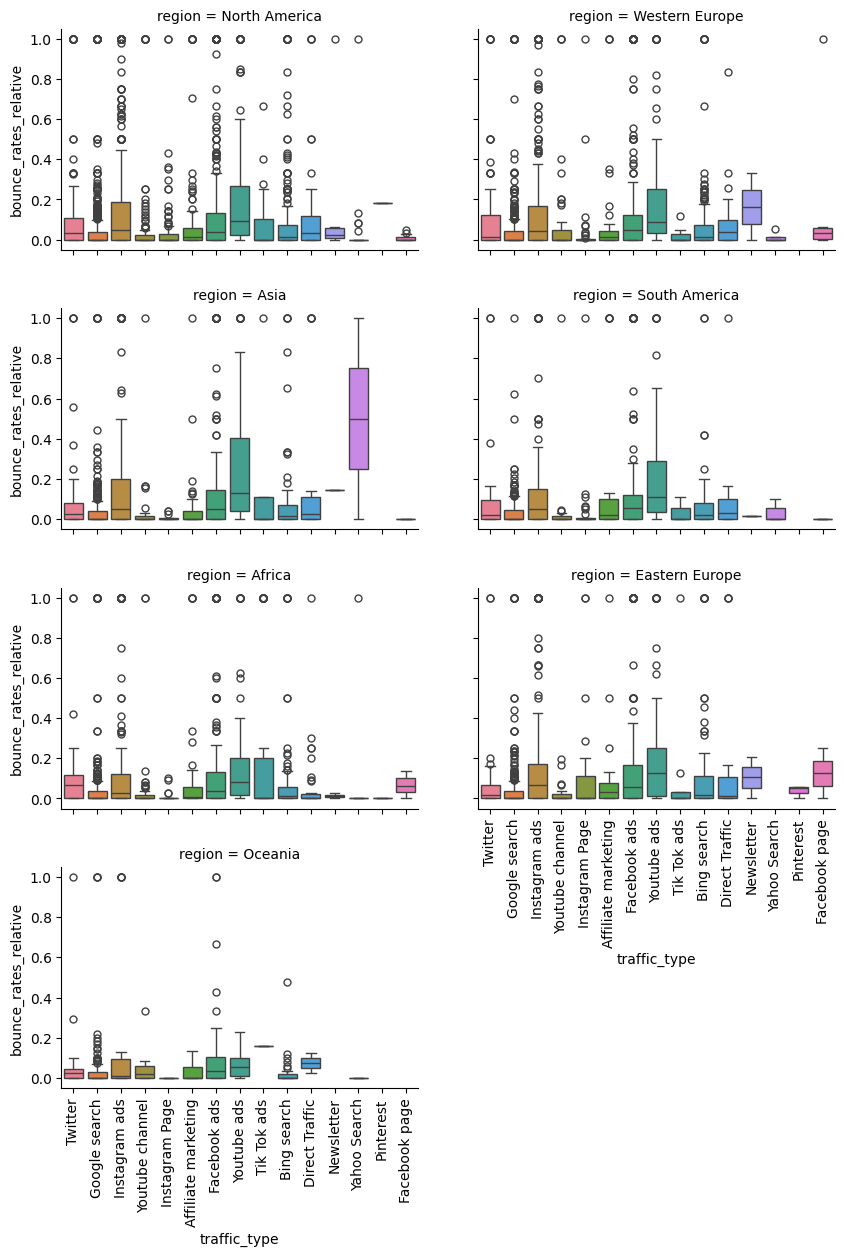

In [ ]:
g = sns.catplot(data=bounce_rates_df, col='region', x='traffic_type', y='bounce_rates_relative', kind='box', hue = 'traffic_type', col_wrap=2, height=3, aspect=1, legend=False)
plt.tight_layout(rect=[0, 0, 1.5, 0.96])
g.set_xticklabels(brd.get_xticklabels(), rotation=90)
plt.show()

### ***What months have generated the most sales from ads traffic?***

In [ ]:
ads_traffic = ['Facebook ads','Instagram ads','Tik Tok ads','Youtube ads']
 # Filter dataset for records only containing elements in the list above
month_ads = customer_activity_df.copy()
total_revenue = month_ads['revenue'].sum()
month_ads = month_ads.loc[month_ads['traffic_type'].isin(ads_traffic)]
month_ads['month'] = month_ads['month'].dt.month
month_ads_1 = month_ads.groupby(['month']).sum()
month_ads_1['proportion_sales_percentage'] = (month_ads_1['revenue']/total_revenue) * 100

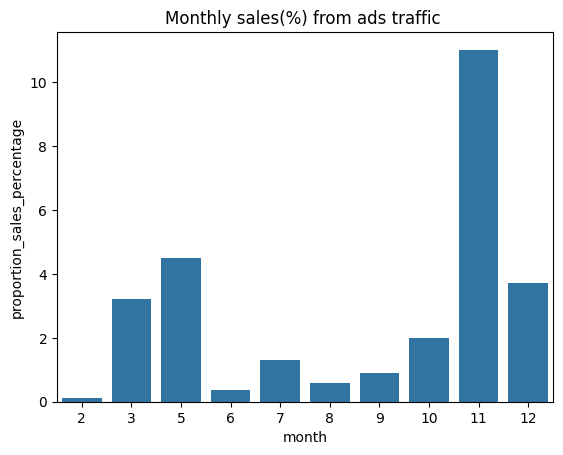

In [ ]:
sns.barplot(x=month_ads_1.index, y=month_ads_1['proportion_sales_percentage'])
plt.title('Monthly sales(%) from ads traffic ')
plt.show()

In [ ]:
month_ads_2 = month_ads.groupby(['month','traffic_type']).sum()
month_ads_2['proportion_sales_percentage'] = (month_ads_2['revenue']/total_revenue) * 100

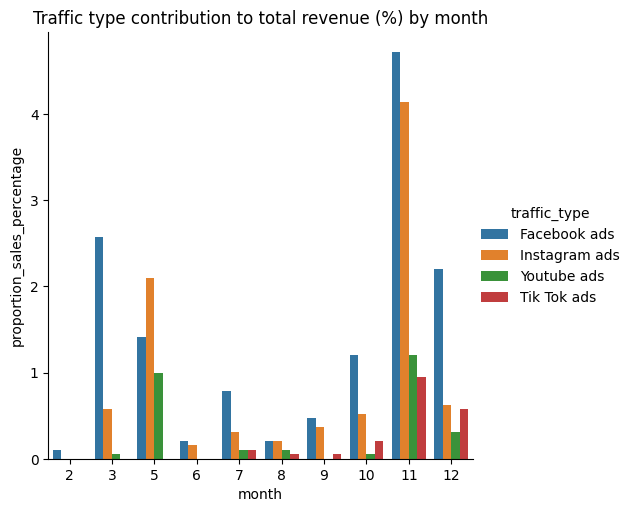

In [ ]:
sns.catplot(x='month', y='proportion_sales_percentage', hue='traffic_type', data=month_ads_2, kind='bar')
plt.title('Traffic type contribution to total revenue (%) by month')
plt.show()

## Task 4

### ***Which region is currently generating the most/least revenue?*** Already answered

### ***What percentage of our returning/new customers are making a purchase when they visit the site?***

### Insights:
- 79.5% of purchases are made by **returning vistors**:
    - Returning visitors make up 86.7% of total visitors.
    - Out of all returning visitors, 14% are making a purchase.

- 19.9% of purchases are made by **new visitors**:
    - New visitors make up 12.7% of total visitors.
    - Out of all new visitors, 24% are making a purchase.

- 0.58% of sales are made by **other visitors** - this is negligible:
    - Other visitors make up 0.56% of total visitors.
    - Out of all other_visitors, 16% of them are making a purchase.
    - This category could be an outlier due to an error in the recording system or perhaps members of staff making a purchase/testing the website and being classified in a separate category.

In [ ]:
visitor_df = customer_activity_df.copy()
counts_visitors = pd.DataFrame(visitor_df['visitor_type'].value_counts())
info_extractor = DataFrameInfo(visitor_df)
visitor_df2 = info_extractor.get_slice(['visitor_type','revenue'])
visitor_df2 = visitor_df2.groupby(['visitor_type']).sum()
visitor_df2 = visitor_df2.join(counts_visitors)
visitor_df2['purchase_%'] = (visitor_df2['revenue'] / visitor_df2['count'])*100
total_visitor_count = 12319
visitor_df2['visitor_%'] = (visitor_df2['count']/total_visitor_count)*100
visitor_df2

,revenue,count,purchase_%,visitor_%
visitor_type,,,,
New_Visitor,379,1567,24.186343,12.720188
Other,11,69,15.942029,0.560110
Returning_Visitor,1517,10683,14.200131,86.719701


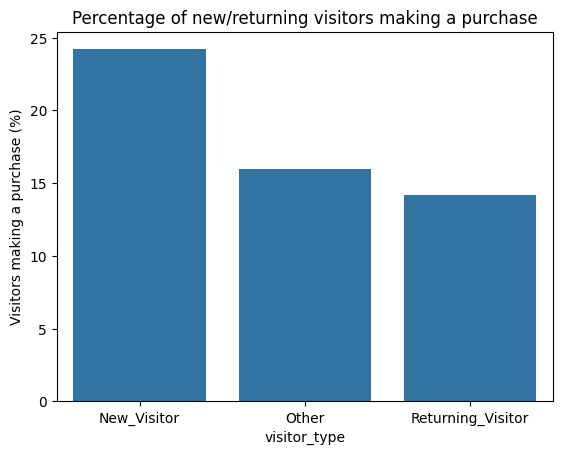

In [ ]:
sns.barplot(x=visitor_df2.index, y=visitor_df2['purchase_%'])
plt.title('Percentage of new/returning visitors making a purchase')
plt.ylabel('Visitors making a purchase (%)')
plt.show()

### Now we are going to visualise the percentage of total revenue coming from each visitor type

In [ ]:
visitor_df2['revenue_%'] = (visitor_df2['revenue'] / total_sales)*100
visitor_df2

,revenue,count,purchase_%,visitor_%,revenue_%
visitor_type,,,,,
New_Visitor,379,1567,24.186343,12.720188,19.874148
Other,11,69,15.942029,0.560110,0.576822
Returning_Visitor,1517,10683,14.200131,86.719701,79.549030


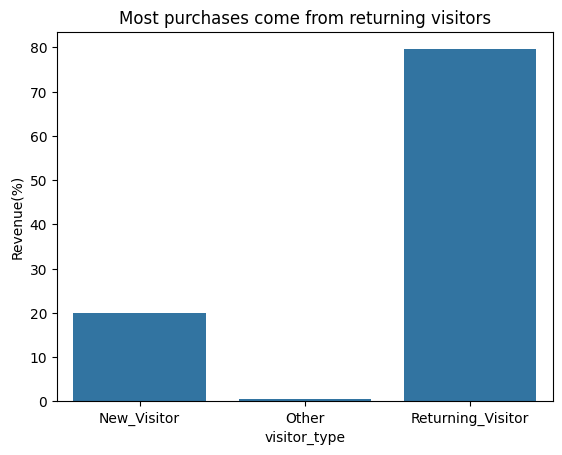

In [ ]:
sns.barplot(x=visitor_df2.index, y=visitor_df2['revenue_%'])
plt.title('Most purchases come from returning visitors')
plt.ylabel('Revenue(%)')
plt.show()

This is explained because the number of returning visitors in our dataset is 10x larger than the number of new visitors.

### ***Are sales being made more on weekends comparatively to weekdays?*** 

Beforehand, we have analysed the percentage of total sales being made on weekdays vs. weekends, as a percentage of the total amount of sales. Here I will breaksdown what percentage of weekend visitors and what percentage of weekday visitors make sales, respectively. Each percentage will be calculated out of the total weekend or weekday visitors.

In [ ]:
sales_weekends_df['counts'] = 1
week_time = sales_weekends_df.groupby(['weekend']).sum()
week_time['percentage_sales_over_visitors'] = (week_time['revenue']/week_time['counts'])*100
week_time

,revenue,counts,percentage_sales_over_visitors
weekend,,,
0,1476,9777,15.096655
1,431,2542,16.955153


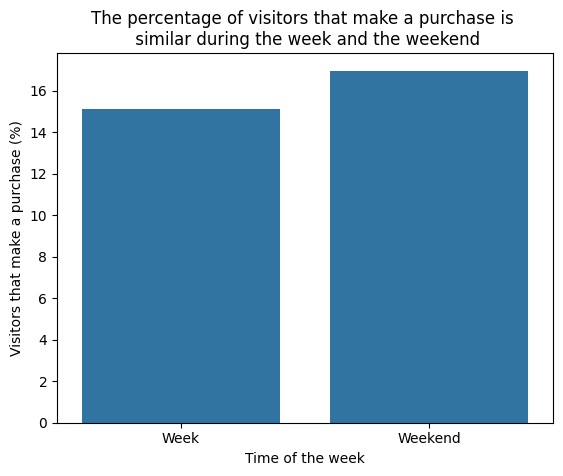

In [ ]:
sns.barplot(x=week_time.index, y=week_time['percentage_sales_over_visitors'])
plt.title('The percentage of visitors that make a purchase is \n similar during the week and the weekend')
new_labels = ['Week', 'Weekend']
plt.xticks(range(len(new_labels)), new_labels)
plt.xlabel('Time of the week')
plt.ylabel('Visitors that make a purchase (%)')
plt.show()

### ***Which months have been the most effective for generating sales?*** Already answered

### ***Is direct/social or advertising traffic contributing heavily to sales?***

In [ ]:
direct_traffic = 'Direct Traffic'
search_traffic = ['Bing search','Google search','Yahoo search']
all_traffic = df1['traffic_type'].unique()
social_traffic = [i for i in all_traffic if (i not in direct_traffic) & (i not in search_traffic)]
df1['traffic_category'] = ''
for index, row in df1.iterrows():
    traffic_value = row['traffic_type']
    if traffic_value in direct_traffic:
        df1.at[index, 'traffic_category'] = 'Direct Traffic'
    elif traffic_value in search_traffic:
        df1.at[index, 'traffic_category'] = 'Search Traffic'
    elif traffic_value in ads_traffic:
        df1.at[index, 'traffic_category'] = 'Ads Traffic'
    elif traffic_value in social_traffic:
        df1.at[index, 'traffic_category'] = 'Social Traffic'

traffic_cat_df = df1.groupby(['traffic_category']).sum()
total_rev = traffic_cat_df['revenue'].sum()
traffic_cat_df['revenue_%'] = (traffic_cat_df['revenue']/total_rev)*100

/var/folders/1t/k9kg2zvn4r75ygn3223s7x080000gn/T/ipykernel_39330/1323794378.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=traffic_cat_df['revenue_%'], x=traffic_cat_df.index, palette=cols2)


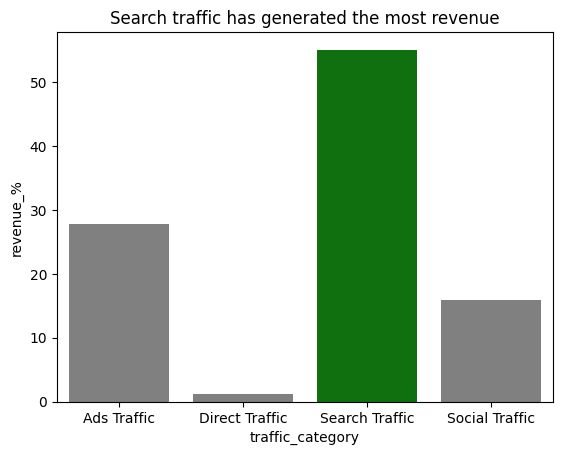

In [ ]:
cols2 = ['grey' if x < 50 else 'green' for x in traffic_cat_df['revenue_%']]
sns.barplot(y=traffic_cat_df['revenue_%'], x=traffic_cat_df.index, palette=cols2)
plt.title('Search traffic has generated the most revenue')
plt.show()